# Gradient Descent

#### 🎯 Learning Goals

1. Understand the concept of **gradients** in machine learning.
2. Understand and implement the **gradient descent** algorithm.

In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dsf_helpers as dsfh

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

___
## Dataset
As with the previous notebook, we will work with the dataset of **bike rentals**. Recall that we keep the following columns:

+ `cnt`: the total number of bike rentals (our target variable).
+ `temp`: the temperature outside (in Celsius, normalized on a scale between 0 and 1).
+ `hum`: the humidity level (normalized on a scale between 0 and 1).
+ `windspeed`: the wind speed (normalized on a scale between 0 and 1).

In [2]:
# Load the bike rental data
rentals = pd.read_csv("data/bike_rental.csv")

# Keep only some columns of interest
rentals = rentals[["cnt", "temp", "hum", "windspeed"]]
rentals.head()

,cnt,temp,hum,windspeed
0,16,0.24,0.81,0.0
1,40,0.22,0.80,0.0
2,32,0.22,0.80,0.0
3,13,0.24,0.75,0.0
4,1,0.24,0.75,0.0


___
## Gradient Computation

Before we can implement gradient descent, we need a way to compute the gradient of the empirical risk with respect to the model parameters. That is, we need to calculate the partial derivative of the loss with respect to each parameter $\beta_i$.

For a linear regression model with $k$ features, recall the squared loss function is:

$$
\begin{align*}
\ell(y^{(i)}, f_{\boldsymbol{\beta}}(\mathbf{x}^{(i)})) &= \left(y^{(i)} - \mathbf{x}^{(i)} \boldsymbol{\beta}\right)^2 \\
&= \left(y^{(i)} - \sum_{j=0}^k x_j^{(i)} \right)^2,
\end{align*}
$$

with empirical risk (or loss) given by:
$$
\hat{L}(f_{\boldsymbol{\beta}}) = \frac{1}{n}\sum_{i=1}^n \ell(y^{(i)}, f_{\boldsymbol{\beta}}(\mathbf{x}^{(i)})) = \frac{1}{n}\sum_{i=1}^n \left(y^{(i)} - \sum_{j=0}^k x_j^{(i)} \right)^2.
$$

thus, the gradient with respect to the parameters is given by:

$$\begin{align*}
\nabla_{\boldsymbol{\beta}} \hat{L}(f_{\boldsymbol{\beta}}) &= \begin{bmatrix}\frac{\partial \hat{L}}{\partial \beta_0} \\ \frac{\partial \hat{L}}{\partial \beta_1} \\ \vdots \\ \frac{\partial \hat{L}}{\partial \beta_k}\end{bmatrix} = \begin{bmatrix}
\frac{1}{n}\sum_{i=1}^n\frac{\partial}{\partial \beta_0} \left(y^{(i)} - \sum_{j=0}^k x_j^{(i)}\beta_j \right)^2 \\
\frac{1}{n}\sum_{i=1}^n\frac{\partial}{\partial \beta_1} \left(y^{(i)} - \sum_{j=0}^k x_j^{(i)}\beta_j \right)^2 \\
\vdots \\
\frac{1}{n}\sum_{i=1}^n\frac{\partial}{\partial \beta_k} \left(y^{(i)} - \sum_{j=0}^k x_j^{(i)}\beta_j \right)^2 
\end{bmatrix} \\
&= \begin{bmatrix}
-\frac{2}{n}\sum_{i=1}^n \left(y^{(i)} - \sum_{j=0}^k x_j^{(i)}\beta_j \right) \\
-\frac{2}{n}\sum_{i=1}^n \left(\left(y^{(i)} - \sum_{j=0}^k x_j^{(i)}\beta_j \right) x_1^{(i)}\right)\\
\vdots \\
-\frac{2}{n}\sum_{i=1}^n \left(\left(y^{(i)} - \sum_{j=0}^k x_j^{(i)}\beta_j \right) x_k^{(i)}\right) \\
\end{bmatrix}
\end{align*}$$


We see that, for the linear regression model, the gradient is a vector of length $k$ where the $j$-th element is $-\frac{2}{n}\sum_{i=1}^n \left(\left(y^{(i)} - \mathbf{x}^{(i)}\boldsymbol{\beta} \right)x_j^{(i)}\right)$.

#### ➡️ ✏️ Task 1
Below is a function which implements the gradient computation for a linear regression model. Try to understand how the code corresponds to the math above. Discuss with your classmates to ensure you have the same understanding.

In [3]:
def gradient(X, y, beta):
    return -2 * ((y - X.dot(beta)).reshape(-1, 1) * X).mean(axis=0) 

___

## Gradient Descent Algorithm

Once we have our gradient, we can use it to perform gradient descent. Recall that gradient descent is an iterative algorithm that updates the parameters $\boldsymbol{\beta}$ in the direction of the negative gradient. That is, we update the parameters by subtracting a scaled version of the gradient from the current parameters. The scaling factor is called the **learning rate**, $\eta$.

The algorithm is as follows:

1. Initialize the parameters $\boldsymbol{\beta}^{(0)}$ to some random values, initialize $t = 0$.
2. Compute the gradient of the empirical risk with respect to the parameters, $\nabla_{\boldsymbol{\beta}} \hat{L}(f_{\boldsymbol{\beta}^{(t)}})$.
3. Update the parameters by subtracting the learning rate times the gradient from the current parameters: 
$$\begin{align*}\boldsymbol{\beta}^{(t+1)} &\leftarrow \boldsymbol{\beta}^{(t)} - \eta \nabla_{\boldsymbol{\beta}} \hat{L}(f_{\boldsymbol{\beta}^{(t)}})\\
t &\leftarrow t + 1 \end{align*}$$
4. Repeat steps 2 and 3 until the parameters *converge*.

How do we know when the parameters converge? Remember that the gradient points in the direction of steepest ascent. Thus, if we keep updating the parameters in the direction of the negative gradient, we will eventually reach a local minimum of the empirical risk. We can check if the parameters have converged by checking if the gradient is close to zero, which is equivalent to being in a *flat* region of the empirical risk.  That is, we can stop the algorithm when $\|\nabla_{\boldsymbol{\beta}} \hat{L}(f_{\boldsymbol{\beta}^{(0)}})\| < \epsilon$ for some small **convergence threshold** $\epsilon$.

*Note*: $\|\mathbf{x}\|$ is the Euclidean norm, i.e., $$\|\mathbf{x}\| = \sqrt{\sum_{i=1}^n x_i^2}.$$


#### ➡️ ✏️ Task 2
Complete the code below to implement gradient descent for a linear regression model of the form:
$$
f_{\boldsymbol{\beta}}(\mathbf{x}) = \beta_0 + \beta_1 \text{temp} + \beta_2 \text{windspeed} + \beta_3 \text{humidity}.
$$

You can then run the code cell below to see how the parameters change over time. You should see that the parameters converge to a stable value after a few iterations.

In [4]:
X = np.random.randn(rentals.shape[0], 4) # ➡️ ✏️ your code here (hint: don't forget the constant term!)
y = rentals["cnt"].values

betas_list = []    # Initialize a list to keep track of the evolution of the betas over time
epsilon = 1e-3     # The convergence criterion
eta = 0.5          # The learning rate
beta = np.zeros(4) # Initialize the beta vector to 0

# Add the initial beta to the list
betas_list.append(beta.flatten().copy()) 


t = 0 # Keep track of the number of iterations
max_t = 750 # Maximum number of iterations

# Run the gradient descent algorithm
while t < max_t: # We stop after max_t iterations even if we don't converge
    t += 1
    # Compute the gradient
    grad = np.ones(4) # ➡️ ✏️ your code here
    
    # Update the beta vector
    beta = beta # ➡️ ✏️ your code here

    # Add the new beta to the list
    betas_list.append(beta.copy())

    # Check for convergence
    if np.linalg.norm(grad) < epsilon:
        print(f"Converged after {t} iterations")
        break

if t == max_t:
    print("Did not converge")

Did not converge


In [5]:
# TODO: REMOVE SOLUTION

X = rentals[["temp", "windspeed", "hum"]].values
X = np.hstack((np.ones((rentals.shape[0], 1)), X))
y = rentals["cnt"].values

betas_list = []    # Initialize a list to keep track of the evolution of the betas over time
epsilon = 1e-3     # The convergence criterion
eta = 0.5          # The learning rate
beta = np.zeros(4) # Initialize the beta vector to 0

# Add the initial beta to the list
betas_list.append(beta.flatten().copy()) 


t = 0 # Keep track of the number of iterations
max_t = 750 # Maximum number of iterations

# Run the gradient descent algorithm
while t < max_t: # We stop after max_t iterations even if we don't converge
    t += 1
    # Compute the gradient
    grad = gradient(X, y, beta)
    
    # Update the beta vector
    beta = beta - eta * grad

    # Add the new beta to the list
    betas_list.append(beta.flatten().copy())

    # Check for convergence
    if np.linalg.norm(grad) < epsilon:
        print(f"Converged after {t} iterations")
        break

if t == max_t:
    print("Did not converge")

Converged after 703 iterations


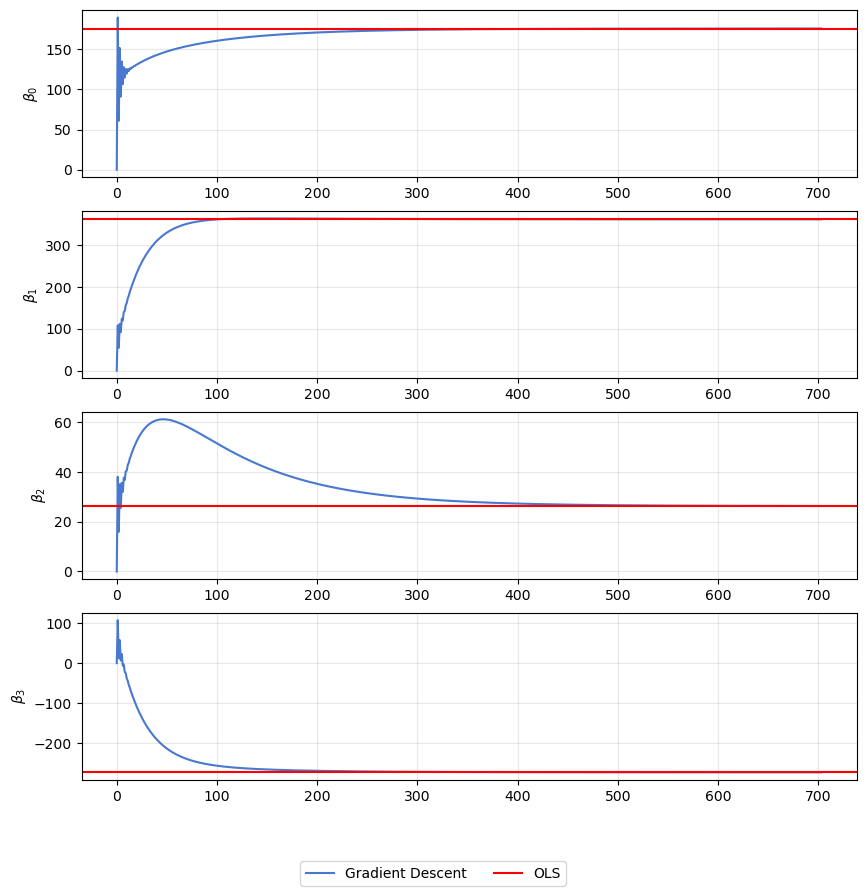

In [6]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

beta_ols = np.linalg.inv(X.T @ X) @ X.T @ y # Compute the OLS solution

for i, ax in enumerate(axs):
    ax.plot([beta[i] for beta in betas_list], label=("Gradient Descent" if i == 0 else ""))
    ax.axhline(beta_ols[i], color="red", label=("OLS" if i == 0 else ""))
    ax.set_ylabel(r"$\beta_{}$".format(i))
    ax.grid(alpha=0.3)

# Creating a single legend for the figure
fig.legend(loc='lower center', ncol=2)


#### ➡️ ✏️ Task 3
Repeat the exercise above (i.e., run the gradient descent algorithm and plot the parameters over time) for different values of the learning rate `eta`. In particular try:
1. `eta=0.4`
2. `eta=0.6`

What do you notice? Discuss with your classmates.

Play around with the learning rate, the convergence threshold `epsilon`, and the maximum number of iterations `max_t` to see how they affect the convergence of the parameters. Try out different starting values for the parameter (`beta`) as well.

Can you try to figure out how the parameters will behave before running the code?

For instance, can you tune the other hyperparameters to make your algorithm converge with `eta=0.4`, what about `eta=0.6`?

Discuss with your classmates.

#### ➡️ ✏️ Task 4

Discuss with your classmates: what are the advantages and disadvantages of gradient descent?
+ Would you prefer the closed-form equation or gradient descent to solve a linear regression problem?
+ Can gradient descent tackle the regression problem with an absolute loss function?
+ What about the 0-1 loss function?

___
#### ⚠️ Lists and copies (you can skip this in a first reading)
Do you see how we used `beta.copy()` instead of just appending `beta` to our `betas_list`? This is because of a fairly complicated concept that really relates more to computer science than data science. In essence, Python lists are truly **arrays of pointers**. This surely doesn't mean much to you now, but try running the following cells to see why using a copy makes sense:

In [7]:
wlist = [] # Create an empty list, e.g., this would be weights_list above
w = np.array([0, 0, 0]) # Create an array of weights (e.g., beta above)
wlist.append(w) # Append the weights to our main list
wlist # Display the value of wlist

[array([0, 0, 0])]

In [8]:
w[1] += 1 # Change the value of the middle element
wlist # Display the value of wlist again

[array([0, 1, 0])]

But wait, didn't we actually store the array `[0, 0, 0]` and not `[0, 1, 0]`!? Let's do it again...

In [9]:
wlist.append(w) # Append the new weights to our main list
w[1] += 1 # Change the value of the middle element again
wlist # Display the value of wlist again

[array([0, 2, 0]), array([0, 2, 0])]

Uh oh... that's not good. We are *retroactively* affecting the weights we have already stored in our main list! What if we use a copy instead?

In [10]:
wlist.append(w.copy()) # Append the weights COPY to our main list
w[1] += 1 # Change the value of the middle element again
wlist # Display the value of wlist again

[array([0, 3, 0]), array([0, 3, 0]), array([0, 2, 0])]

The third item of our list was not impacted by the increment. This is because it's not the weight array anymore but a copy thereof. Make sure you understand what happened in this small section, this is a dangerous pitfall of Python that surely happens to every programmer at least once (and probably many more times...).

Intuitively, you can think that Python keeps in mind that the elements of `wlist` are the arrays `w` and it assumes that we want to keep a link between the two. So `wlist` should remember that it contains `w` and that if `w` gets changed, so should `wlist`. In fact, Python does not keep `wlist` in memory as such. All it has in memory is the instruction that `wlist` is a list that contains `w` and to fill in whatever `w` happens to be at the moment. If you want to break the link between `wlist` and `w` (which, as a data scientist, you want most of the time) then you use `.copy()`. Does it now make sense?

What we just explained only applies if the object that is appended is already a type of list, e.g. a numpy array. If it is a primitive object like `b` (a simple variable that stores a single number), then there is no need for `.copy()`. In fact, if you try, you get an error. That's nice, so you know you don't have to use it!


**Main takeaway**: Be careful when storing results from lists, arrays, dictionaries, etc. in other containers (typically lists or dictionaries). Changing the item ex-post will also change the value stored in your *larger* container. If you want to avoid this (which you want most of the time) make sure to use a copy!